(sec:signale)=
# Signale

Zum Verständnis der Signalverarbeitung ist es notwendig eine
mathematische Beschreibung von Signalen zu entwickeln.
Da Signale sehr unterschiedlicher Natur sein können, ist zur Beschreibung eine grobe
Klassifikation nützlich.

Um die einzelnen Signalklassen zu entwickeln, können als
Beispiele natürliche Signale hearngezogen werden:

- Sprache: Das wesentliche Signal der menschlichen Kommunikation.

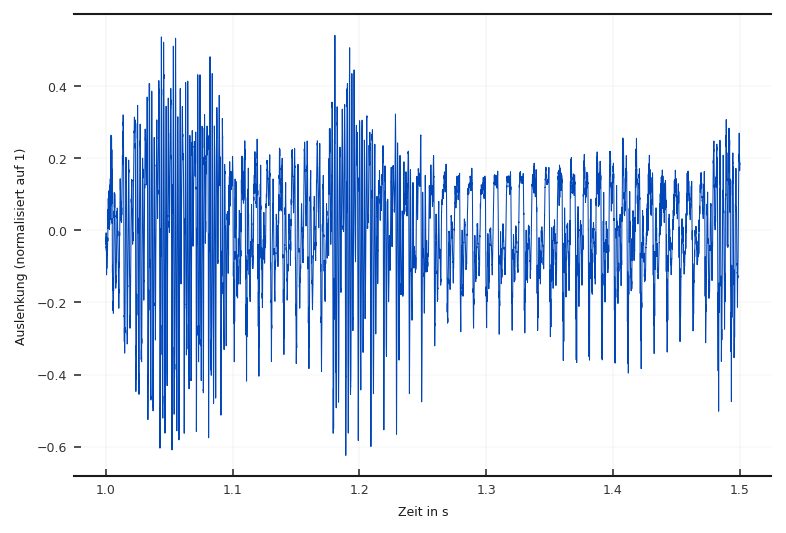

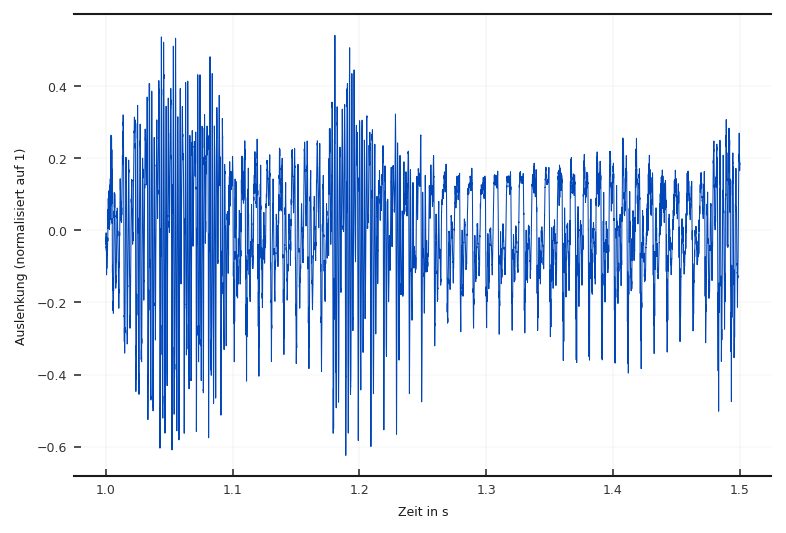

In [1]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   17.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import soundfile
import numpy
from matplotlib import pyplot

# determine where we're running from and set paths accordingly
try: 
    if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
        prefix = ''
except:
    prefix = '../../'

matplotlib.style.use(f'{prefix}sv.mplstyle')

#reads signal and samplerate of the sound file
signal, samplerate = soundfile.read(f'{prefix}data/Testsatz.wav') 
# time vector in seconds
time = numpy.linspace(0, len(signal)/samplerate, len(signal)) 

# setting start and end of the time
time_start = 1 # in seconds
time_end = 1.5 # in seconds

# cuts signal and time
sample_start = int(time_start * samplerate) # calculates the starting sample
sample_end = int(time_end * samplerate) # and the end sample
short_signal = signal[sample_start:sample_end] # extracts the chosen timeframe 
short_time = time[sample_start:sample_end] # cuts the corresponding time vector

# plots
fig, ax = pyplot.subplots()
ax.plot(short_time, short_signal, label='Ausschnitt vom Sprachsignal', 
        linewidth = 0.5)
ax.grid(axis='y', color='0.8')
ax.set(xlabel='Zeit in s', ylabel='Auslenkung (normalisiert auf 1)')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

pyplot.show()

# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("sprachsignal", fig, display=False)

```{glue:figure} sprachsignal
:figwidth: 100%
:name: "plt:sprachsignal"

Typischer Amplitudenverlauf über der Zeit eines Sprachsignals.
```
- Musik: Die vergnügliche Schwester der Sprache
- EKG und EEG- Signale: Vielkanalig und in vielen Forschungsbereichen eingesetzt
- Vitaldaten (Puls, Blutdruck): Für die persönliche Optimierung oder der medizinischen Diagnose
- Bilder / Videos: Eine andere wichtige Modalität der Kommunikation

Aber auch aus völlig anderen Bereichen, lassen sich bestimmte
Größen als Signale interpretieren:

- DAX-Abschlusskurse

In [2]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   17.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import yfinance
import matplotlib
from matplotlib import pyplot

try: 
    if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
        prefix = ''
except:
    prefix = '../../'

matplotlib.style.use(f'{prefix}sv.mplstyle')

dax = yfinance.Ticker("DAX") # chooses the DAX stock
data = dax.history(period="1wk") # gets course data as pandas Dataframe
close = data[["Close"]] # selects the Close coulumn in the Dataframe
close.plot(marker='X', color='black')

# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("daxkurs", pyplot.gcf(), display=False)

pyplot.show()

ModuleNotFoundError: No module named 'yfinance'

```{glue:figure} daxkurs
:figwidth: 75%
:name: "plt:daxkurs"

Verlauf des DAX Abschlusskurses über mehrere Tage.
```

- Verkehrsampelsignale

In [ ]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   17.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import numpy
from matplotlib import pyplot
from matplotlib.widgets import RadioButtons

# determine where we're running from and set paths accordingly
try: 
    if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
        prefix = ''
except:
    prefix = '../../'

matplotlib.style.use(f'{prefix}sv.mplstyle')

d_t = 5 # timespan of one datapoint

# first 4 datapoints set the order of the colours on the axis
# and are not valid data points
lights = ["green", "yellow", "yellow/red", "red", "red", "red", 
        "red", "yellow/red", "green", "green", "green", "yellow", "red", "red", "red"] 
t = numpy.linspace(0, d_t*(len(lights)-1), len(lights))

fig, ax = pyplot.subplots()
line, = ax.step(t, lights, where='post') # defines the steps of a step diagram
ax.grid(axis='x', color='0.8')
ax.set(xlabel='Zeit in s', ylabel='Ampelfarbe')
ax.set_xlim((15, 70))

pyplot.show()

# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("verkehrsampel", fig, display=False)


`````{tab-set}
````{tab-item} Buchabbildung
```{glue:figure} verkehrsampel
:figwidth: 75%
:name: "plt:verkehrsampel"
Ampelsignal im normalen Betrieb.
```
````
````{tab-item} Interaktiv arbeiten
1) Starten des interaktiven Programms - `Signale_Ampel.py` in `jupyterbook/code/interactive_programs/`.
2) Steuerung des Signals über die Radiobuttons.
````
`````

Mehr technischer Natur sind z.B:

- Das optische Signal, dass ein CD-Player von der CD liest.
- Das Signal, dass ein Pulsmessgerät ausgibt.

Als Gemeinsamkeiten fallen auf, dass die jeweiligen Signale meistens eine
unabhängige Größe beinhalten (meistens die Zeit) und eine abhängige Größe, zum Beispiel
den Schalldruck am Mund. Dies wird mathematisch durch $p(t)$ ausgedrückt. 

```{Admonition} Hinweis 
:class: tip
Aus der Mathematik ist die Kurzform $y = x^2$ geläufiger als $y(x) = x^2$.
```

Weiterhin ist allen Signalen gemeinsam, dass sie
eine bestimmte Information enthalten.

```{admonition} Wichtig
:class: attention
Signale sind Funktionen oder Wertfolgen, die Informationen repräsentieren.
```

## Klassifikation
Die Unterschiedlichkeiten der Signale wirft die Frage auf, ob es Gemeinsamkeiten zwischen verschiedenen Signalen gibt und wie diese Gemeinsamkeiten zu bezeichnen sind. Dies kann grob als eine Art Klassifikation der
Signale betrachtet werden.

### Wertebereich
Eine erste Unterteilung ist möglich, indem der Wertebereich der unterschiedlichen
Signale untersucht wird. Es fällt auf, dass ein Teil der Signale keinerlei Grenzen
in der Auflösung hat. So ist bei natürlich gesprochener Sprache jeder Schalldruck
innerhalb der physikalischen Grenzen möglich. Im Gegensatz dazu nimmt eine Ampel im Normalbetrieb nur vier Zustände an.

Dies führt zu der Kategorie Wertebereich, die in die beiden Klassen
```{admonition} Wichtig
:class: attention
wertkontinuierlich vs. wertdiskret
```
unterteilt werden kann.

### Definitionsbereich
Eine weitere sehr wichtige Unterteilung ist der Definitionsbereich. Für Signale
ist dies die Frage der Gültigkeit eines Signals. Beim natürlichen Sprachsignal ist die Gültigkeit
immer gegeben. Ein Gegenbeispiel ist der DAX-Abschlusskurs, der immer nur
um 20.00 Uhr gültig ist.

Somit ergibt sich als eine weitere Unterteilung:
```{admonition} Wichtig
:class: attention
zeitkontinuierlich vs. zeitdiskret
```

Nur wenn ein Signal in den beiden Kategorien diskret ist, spricht man von einem **digitalen Signal**.

```{admonition} Wichtig
:class: attention
Ein digitales Signal ist wert- und zeitdiskret.
```

{numref}`Abbildung %s <plt:WertZeit>` zeigt die vier
Kombinationsmöglichkeiten, die sich durch die beiden Kategorien
Wertebereich und Definitionsbereich ergeben.

In [ ]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   17.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import numpy
from matplotlib import pyplot

# determine where we're running from and set paths accordingly
try: 
    if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
        prefix = ''
except:
    prefix = '../../'

matplotlib.style.use(f'{prefix}sv.mplstyle')

len_cont = 1100 # number of steps for continuous signal
len_disc = 12 # number of steps for discrete signal
steps = int(len_cont/(len_disc)) # number of 'continuous' steps between discrete steps

t = numpy.linspace(0, 11, len_cont) # 'continuously' sampled
dt = numpy.linspace(0, 11, len_disc) # discretely sampled
v = 0.05*(t-1)*(t-4)*(t-9) # example cubic function values

dv = numpy.round(v[:]) # discrete values of function rounded to integers
v_dt = v[0 : (len_cont) : int((steps)*12./11.)] # discretely sampled, non discrete values 
dv_dt = dv[0 : (len_cont) : int((steps)*12./11.)] # discretely sampled, discrete values

# abbreviations: ct/cv = continuous time/values, dt/dv = discrete time/values
fig, ((ax_2x2_ct_cv, ax_2x2_dt_cv), 
        (ax_2x2_ct_dv, ax_2x2_dt_dv)) = pyplot.subplots(2, 2)

ax_2x2_ct_cv.plot(t, v)
ax_2x2_ct_dv.plot(t, dv)
ax_2x2_dt_cv.stem(dt, v_dt, use_line_collection=True)
ax_2x2_dt_dv.stem(dt, dv_dt, use_line_collection=True)

ax_2x2_ct_cv.set(xlabel='Zeit in s', ylabel='Ausgangswerte', 
        title='zeit- und wertkontinuierlich (analog)')
ax_2x2_dt_cv.set(xlabel='Zeit (diskret) in s', ylabel='Ausgangswerte', 
        title='zeitdiskret und wertkontinuierlich')
ax_2x2_ct_dv.set(xlabel='Zeit in s', ylabel='Ausgangswerte (diskret)', 
        title='zeitkontinuerlich und wertdiskret')
ax_2x2_dt_dv.set(xlabel='Zeit (diskret) in s',ylabel='Ausgangswerte (diskret)', 
        title='zeit- und wertdikret (digital)')
pyplot.tight_layout()

pyplot.show()

# glue this figure to paste it later (no effect outside of MyST NB)

from myst_nb import glue
glue("WertZeit", fig, display=False)

```{glue:figure} WertZeit
:figwidth: 100%
:name: "plt:WertZeit"

Die vier Kombinationsmöglichkeiten für wert- oder zeitkontinuierliche bzw.
wert- oder zeitdiskrete Signale.
```

### Kanalanzahl
Betrachtet man die genannten Beispiele, so fällt zumindest bei Musikaufnahmen auf, dass
das Ausgabesignal zweikanalig ist, um die Stereophonie zu erhalten. Andere Signale
sind dagegen einkanalig. Ein weiteres Unterscheidungsmerkmal ist also:

```{admonition} Wichtig
:class: attention
einkanalig vs. mehrkanalig
```

Ein besonderer Fall stellen komplexwertige Signale dar, die man als eine besondere
Form der zweikanaligen Signale interpretieren kann, wenn man den Real- und Imaginäranteil
getrennt betrachtet.

$$
  z(t) = x(t) + j\;y(t)
$$

Häufig wird aber auch dieser Aspekt mit zur Klassifikation hinzugezogen.

```{admonition} Wichtig
:class: attention
reellwertig vs. komplexwertig
```

### Dimensionalität
Vor der allgemeinen Definition von Signalen wurde von abhängigen und unabhängigen Größen gesprochen.
Nimmt man ein Bild als spezielles Signal bestehen zwischen der x-Achse und der y-Achse
keine Abhängigkeiten. Es liegen zwei unabhängige Größen vor, die ein Signal darstellen.
In diesem Zusammenhang spricht man von Mehrdimensionalität. Die Mehrdimensionalität
wird mathematisch durch die Anzahl der Größen in den Abhängigkeitsklammern ausgedrückt.
Für ein zweidimensionales Bild zum Beispiel durch $B(x,y)$.

Die Klassifikation lautet also:

```{admonition} Wichtig
:class: attention
eindimensional vs. mehrdimensional
```

### Zufälligkeit
Betrachtet man die oben angenommenen Beispiele, so ist bei den meisten
Beispielen nicht genau bekannt, wie das Signal aussehen wird. Die
Signale sind in den meisten Fällen näherungsweise zufällig. Man
spricht in diesem Fall auch von stochastischen Signalen.
Im Gegensatz dazu ist das Ampelsignal im normalen Betrieb
absolut vorhersagbar.

Ein weiteres Unterscheidungsmerkmal ist somit:

```{admonition} Wichtig
:class: attention
stochastisch vs. determiniert
```

### Periodizität
Bei determinierten Signalen kann eine weitere Unterscheidung vorgenommen werden,
in dem überprüft wird, ob sich das Signal in einem bestimmten Zeitraum $\tau$
regelmäßig wiederholt.

$$
  x(t) = x(t+n\tau) \quad \text{mit} \quad n\in \mathbb{Z}~~~\text{,}
$$ 

wobei $\mathbb{Z}$ die Menge der ganzen Zahlen darstellt ($\cdots,-3,-2,-1,0,1,2,3,\cdots$).
Ein Beispiel hierfür ist das periodische Ampelsignal.

Es ergibt sich die Unterscheidung:

```{admonition} Wichtig
:class: attention
periodisch vs. nicht-periodisch
```
```{admonition} Wichtig
:class: attention
Alle periodische Signale sind determiniert.
```

## Digitalisierung: eine erste Annäherung

Die meisten natürlichen Signale, insbesondere die für das Hören wichtigen Signale Sprache und Musik, sind analoge Signale und müssen zunächst digitalisiert werden.
Dazu sind zwei Schritte notwendig. Die Umwandlung zeitkontinuierlicher Signale in zeitdiskrete, sowie die Umwandlung des unendlich fein aufgelösten Wertebereichs in einen beschränkten diskreten Wertebereich.

Diese beiden Teilaufgaben werden

- Abtastung (*Sampling*) und
- Quantisierung (*Quantization*)

genannt.

Es folgt zunächst nur eine pragmatische Betrachtungen. Die theoretischen
Hintergründe können erst nach der Einführung weiterer Analysekonzepte erläutert werden.

(sec:Abtastung)=
### Abtastung
Bei der Abtastung wird das zeitkontinuierliche Signal in ein zeitdiskretes Signal
umgewandelt. Dies geschieht dadurch, dass aus dem kontinuierlichen Signal
zu bestimmten Zeiten Proben (*Samples*) entnommen werden. Man kann sich dies
als eine Art Schalter vorstellen, der immer nur für einen kurzen Zeitpunkt das Signal
durchlässt (siehe {numref}`Abbildung %s <fig:SignalflussAbtastung>`)

```{figure} ../images/ps/Signalfluss.png
---
height: 200px
name: fig:SignalflussAbtastung
---
Signalfluss zur Digitalisierung eines analogen Signals.
```

In der DSV geht man in den meisten Fällen implizit davon aus, dass
diese Abtastung in einem regelmäßigen Interval
erfolgt, dass bei Zeitsignalen Abtastinterval $T$ genannt wird (bei Bildern ist dies die Pixel-Auflösung).

```{admonition} Hinweis
:class: tip
Diese Regelmäßigkeit ist nicht zwingend, sie vereinfacht nur die weitergehenden Überlegungen.
```

Die Abtastrate, im weiteren auch mit dem eingedeutschten Begriff Samplingfrequenz $f_\text{s}$ bezeichnet,
ist der Kehrwert zum Abtastinterval

$$
    f_\text{s} = \frac{1}{T}
$$

und wird in Hertz (Hz), also $1/\text{s}$ angegeben.

Die Frage lautet nun, mit welcher Frequenz ein Signal abgetastet werden muss, damit
die digitale Repräsentation dem analogen Original entspricht. Insbesondere, wenn man abschließend das digitale Signal wieder in ein analoges Signal zurück wandeln will, ist die Frage:

```{admonition} Wichtig
:class: attention
Welche Abtastfrequenz ist notwendig um eine vollständige Rekonstruktion, also eine verlustlose Diskretisierung eines Signals, zu erreichen.
```

Um dies zu veranschaulichen, sind in der {numref}`Abbildung %s <plt:AbtastungErklaerung2>`
verschiedene Sinustöne gezeigt, die bei gleichbleibender Abtastrate abgetastet werden. Es wird deutlich dass, sehr tiefe Frequenzen besonders gut dargestellt werden (a), je höher die Frequenzen werden, desto weniger Abtastwerte
repräsentieren die analoge Funktion (b,c).  
Ist die Frequenz des Sinus genau halb so hoch kann die Funktion gar nicht mehr erkannt werden, da sich eine Konstante ergibt (d).  
Erhöht man die Frequenz des Sinus noch weiter, entsprechen die Abtastwerte genau den Abtastwerten einer niedrigeren Frequenz, z.B. führt in (e) die Verdoppelung ebenfalls auf eine Nullfolge. Betrachtet man nur die Folge der Abtastwerte (gut in (f) zu sehen) und nicht die Zeitpunkte des Auftretens (diese Information ist nach einer Abtastung nicht mehr vorhanden), so kommt es zu Doppeldeutigkeiten. Dieser Effekt wird **Aliasing** genannt.

In [ ]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   17.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import numpy
from matplotlib import pyplot
from matplotlib.widgets import Slider
from matplotlib.widgets import RadioButtons

matplotlib.style.use('sv.mplstyle')

def isnotebook(): 
#from https://stackoverflow.com/questions/15411967/how-can-i-check-if-code-is-executed-in-the-ipython-notebook
    try:
        shell = get_ipython().__class__.__name__
        if shell == 'ZMQInteractiveShell':
            return True   # Jupyter notebook or qtconsole
        elif shell == 'TerminalInteractiveShell':
            return False  # Terminal running IPython
        else:
            return False  # Other type (?)
    except NameError:
        return False      # Probably standard Python interpreter



nbflag = isnotebook()

if (nbflag == False):

    fs_cont = 100000 # 'continous' sample is sampled as such a high frequency that it seem continuous
    fs = 1000 # discrete sampled
    freq = 200 # sinus frequency in Hz
    steps = int(fs_cont/fs) # number of 'continuous' steps between discrete steps
    T = 0.02 # signal length in s

    # time vectors
    t = numpy.linspace(0, T, int(T*fs_cont+1)) # 'continuous'
    dt = t[0:len(t):steps] # extracts discrete time from continuous time

    # function values
    sin_t = numpy.sin(2 * numpy.pi * t * freq) # continuous
    sin_dt = numpy.sin(2 * numpy.pi * dt * freq) # discrete

    # plots
    fig_sin, ax_sin = pyplot.subplots()
    pyplot.subplots_adjust(bottom=0.25)
    graph, = ax_sin.plot(t, sin_t)
    markerline, stemlines, baseline = ax_sin.stem(dt, sin_dt, use_line_collection=True, linefmt='r', markerfmt = 'or')
    #stemlines.remove()

    ax_sin.set_xlim([0, 0.02])
    ax_sin.set(ylabel='Amplitude', xlabel='Zeit in s')
    ax_sin.set_title(f'Sinus = {freq} Hz, Abtastfrequenz = 1000 Hz')

    # adds slider for adjustable sinus frequency
    ax_freq = pyplot.axes([0.45, 0.1, 0.45, 0.03], facecolor='lightgoldenrodyellow')
    slider_freq = Slider(ax_freq, 'Sinusfrequenz (Hz)', 0, 3000, valinit=200, valstep=10)

    # updates the continuous and sampled values once the frequency has been changed
    def update(val):
        global freq
        ax_sin.cla()
        freq = slider_freq.val
        ax_sin.plot(t, numpy.sin( 2 * numpy.pi * (freq * t)))
        sin_dt = numpy.sin( 2 * numpy.pi * (freq * dt))
        ax_sin.stem(dt, sin_dt, use_line_collection=True,linefmt='r', markerfmt = 'or')
        ax_sin.set_title(f'Sinusfrequenz = {freq} Hz, Abtastfrequenz = 1000 Hz')
        fig_sin.canvas.draw_idle()

    slider_freq.on_changed(update)

    pyplot.subplots_adjust(left=0.3)
    rax = pyplot.axes([0.05, 0.7, 0.15, 0.15], facecolor='lightgoldenrodyellow')

    radio = RadioButtons(rax, ('200 Hz', '500 Hz', '800 Hz', '1200 Hz', '1800 Hz'))

    def update_example(label):
        ax_sin.cla()
        hzdict = {'200 Hz': 200, '500 Hz': 500, '800 Hz': 800, '1200 Hz': 1200, '1800 Hz': 1800}
        freq = hzdict[label]
        ax_sin.plot(t, numpy.sin( 2 * numpy.pi * (freq * t)))
        sin_dt = numpy.sin( 2 * numpy.pi * (freq * dt))
        ax_sin.stem(dt, sin_dt, use_line_collection=True,linefmt='r', markerfmt = 'or')
        ax_sin.set_title(f'Sinusfrequenz = {freq} Hz, Abtastfrequenz = 1000 Hz')
        fig_sin.canvas.draw_idle()
        slider_freq.set_val(freq)
        
    radio.on_clicked(update_example)
    pyplot.show()
else:
    fs_cont = 100000 # 'continous' sample is sampled as such a high frequency that it seem continuous
    fs = 1000 # discrete sampled
    freq = [100, 200, 350, 500, 1000, 1350] # sinus frequency in Hz
    alpha = ['a) ','b) ','c) ','d) ','e) ','f) ']
    steps = int(fs_cont/fs) # number of 'continuous' steps between discrete steps
    T = 0.02 # signal length in s

    # time vectors
    t = numpy.linspace(0, T, int(T*fs_cont+1)) # 'continuous'
    dt = t[0:len(t):steps] # extracts discrete time from continuous time
    fig_sin, ax_sin = pyplot.subplots(nrows=3, ncols=2)
    
    for count,ff in enumerate(freq):
    # function values
        sin_t = numpy.sin(2 * numpy.pi * t * ff) # continuous
        sin_dt = numpy.sin(2 * numpy.pi * dt * ff) # discrete
        if (count == 0):
            ax = ax_sin[0][0]
        
        if (count == 1):
            ax = ax_sin[0][1]
        
        if (count == 2):
            ax = ax_sin[1][0]
        
        if (count == 3):
            ax = ax_sin[1][1]

        if (count == 4):
            ax = ax_sin[2][0]
        
        if (count == 5):
            ax = ax_sin[2][1]
        
        graph, = ax.plot(t*1000, sin_t)
        markerline, stemlines, baseline = ax.stem(dt*1000, sin_dt, use_line_collection=True, linefmt='r', markerfmt = 'or')
    #stemlines.remove()

        ax.set_xlim([0, 20])
        ax.set(ylabel='Amplitude', xlabel='Zeit in ms')
        fig_name = alpha[count]
        ax.set_title(f'{fig_name}Sinus = {ff} Hz, Abtastfrequenz = 1000 Hz')

    pyplot.tight_layout()
    pyplot.show()


# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("Abtast2", fig_sin, display=False)

`````{tab-set}
````{tab-item} Buchabbildung
```{glue:figure} Abtast2
:figwidth: 100%
:name: "plt:AbtastungErklaerung2"

Sinusabtastung mit unterschiedlichen Abtastfrequenzen.
```
````
````{tab-item} Interaktiv arbeiten

1) Starten des interaktiven Programms - `Signale_Abtastung_Sinusfrequenz_einstellen.py` in `jupyterbook/code/interactive_programs/`.
2) Mit den Radiobuttons die 5 Beispielfrequenzen ansehen.
3) Fragen die es zu klären gibt, bzw. Dinge die auffallen:
    
    * Warum entsteht bei 500 Hz eine Nullfolge?
    * Warum ist die Folge bei 200 Hz exakt die gleiche, wie bei 1200 Hz (2200 Hz) (800 Hz, 1800 Hz, 2800 Hz)?
    * Welche Ähnlichkeiten erkennt man bei 200 Hz und 800 Hz?

4) Abschließend mit dem Slider in der Nähe von 0 Hz, der halben Abtastrate und der Abtastrate experimentieren und sehen, welche Effekte sich ergeben.

```{admonition} Erkenntnis
:class: attention

Alle Frequenzen wiederholen sich nach der Abtastfrequnz. Alle Frequenzen (z.B. 200 Hz) bis zur halben Abtastfrequenz sind gespiegelt zu finden, wenn die Frequenz von der Abtastfrequenz subtrahiert wird (z.B. 1000 Hz-200 Hz = 800 Hz).
```
````
`````

In [ ]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   17.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import numpy
from matplotlib import pyplot
from matplotlib.widgets import Slider
from matplotlib.widgets import RadioButtons


def isnotebook(): 
#from https://stackoverflow.com/questions/15411967/how-can-i-check-if-code-is-executed-in-the-ipython-notebook
    try:
        shell = get_ipython().__class__.__name__
        if shell == 'ZMQInteractiveShell':
            return True   # Jupyter notebook or qtconsole
        elif shell == 'TerminalInteractiveShell':
            return False  # Terminal running IPython
        else:
            return False  # Other type (?)
    except NameError:
        return False      # Probably standard Python interpreter



nbflag = isnotebook()
# nbflag = True

if (nbflag == False):

    fs_cont = 100000 # 'continous' sample is sampled as such a high frequency that it seem continuous
    fs = 1000 # discrete sampled
    freq = 100 # sinus frequency in Hz
    steps = int(fs_cont/fs) # number of 'continuous' steps between discrete steps
    T = 0.04 # signal length in s

    # time vectors
    t = numpy.linspace(0, T, int(T*fs_cont+1)) # 'continuous'
    dt = t[0:len(t):steps] # extracts discrete time from continuous time

    # function values
    sin_t = numpy.sin(2 * numpy.pi * t * freq) # continuous
    sin_dt = numpy.sin(2 * numpy.pi * dt * freq) # discrete

    # plots
    fig_sin, ax_sin = pyplot.subplots()
    pyplot.subplots_adjust(bottom=0.25)
    graph, = ax_sin.plot(t, sin_t)
    markerline, stemlines, baseline = ax_sin.stem(dt, sin_dt, use_line_collection=True, linefmt='r', markerfmt = 'or')
    #stemlines.remove()

    ax_sin.set_xlim([0, 0.03])
    ax_sin.set(ylabel='Amplitude', xlabel='Zeit in s')
    ax_sin.set_title(f'Sinus = 100 Hz, Abtastfrequenz = {fs} Hz')

    # adds slider for adjustable sinus frequency
    ax_freq = pyplot.axes([0.45, 0.1, 0.45, 0.03], facecolor='lightgoldenrodyellow')
    slider_freq = Slider(ax_freq, 'Sinusfrequenz (Hz)', 0, 2000, valinit=fs, valstep=10)

    # updates the continuous and sampled values once the frequency has been changed
    def update(val):
        global freq
        ax_sin.cla()
        fs = slider_freq.val
        steps = int(fs_cont/fs) # number of 'continuous' steps between discrete steps

        # time vectors
        t = numpy.linspace(0, T, int(T*fs_cont+1)) # 'continuous'
        dt = t[0:len(t):steps] # extracts discrete time from continuous time
        
        ax_sin.plot(t, numpy.sin( 2 * numpy.pi * (freq * t)))
        sin_dt = numpy.sin( 2 * numpy.pi * (freq * dt))
        ax_sin.stem(dt, sin_dt, use_line_collection=True,linefmt='r', markerfmt = 'or')
        ax_sin.set_title(f'Sinusfrequenz = 100 Hz, Abtastfrequenz = {fs} Hz')
        fig_sin.canvas.draw_idle()

    slider_freq.on_changed(update)

    pyplot.subplots_adjust(left=0.3)
    rax = pyplot.axes([0.05, 0.7, 0.15, 0.15], facecolor='lightgoldenrodyellow')

    radio = RadioButtons(rax, ('100 Hz', '200 Hz', '300 Hz', '500 Hz', '1000 Hz'))

    def update_example(label):
        ax_sin.cla()
        hzdict = {'100 Hz': 100, '200 Hz': 200, '300 Hz': 300, '500 Hz': 500, '1000 Hz': 1000}
        fs = hzdict[label]
        steps = int(fs_cont/fs) # number of 'continuous' steps between discrete steps
        
        # time vectors
        t = numpy.linspace(0, T, int(T*fs_cont+1)) # 'continuous'
        dt = t[0:len(t):steps] # extracts discrete time from continuous time

        ax_sin.plot(t, numpy.sin( 2 * numpy.pi * (freq * t)))
        sin_dt = numpy.sin( 2 * numpy.pi * (freq * dt))
        ax_sin.stem(dt, sin_dt, use_line_collection=True, linefmt='r', markerfmt = 'or')
        ax_sin.set_title(f'Sinusfrequenz = 100 Hz, Abtastfrequenz = {fs} Hz')
        fig_sin.canvas.draw_idle()
        slider_freq.set_val(fs)
        
    radio.on_clicked(update_example)
    pyplot.show()
else:
    # matplotlib.style.use('sv.mplstyle')
    fs_cont = 100000 # 'continous' sample is sampled as such a high frequency that it seem continuous
    fs = [1000, 500, 300, 200, 150, 100] # discrete sampled
    freq = [100] # sinus frequency in Hz
    alpha = ['a) ','b) ','c) ','d) ','e) ','f) ']
    T = 0.04 # signal length in s

    fig_sin, ax_sin = pyplot.subplots(nrows=3, ncols=2)
    
    for count,ff in enumerate(fs):
    # time vectors
        steps = int(fs_cont/ff) # number of 'continuous' steps between discrete steps
        t = numpy.linspace(0, T, int(T*fs_cont+1)) # 'continuous'
        dt = t[0:len(t):steps] # extracts discrete time from continuous time
    # function values
        sin_t = numpy.sin(2 * numpy.pi * t * freq) # continuous
        sin_dt = numpy.sin(2 * numpy.pi * dt * freq) # discrete
        if (count == 0):
            ax = ax_sin[0][0]
        
        if (count == 1):
            ax = ax_sin[0][1]
        
        if (count == 2):
            ax = ax_sin[1][0]
        
        if (count == 3):
            ax = ax_sin[1][1]

        if (count == 4):
            ax = ax_sin[2][0]
        
        if (count == 5):
            ax = ax_sin[2][1]
        
        graph, = ax.plot(1000*t, sin_t)
        markerline, stemlines, baseline = ax.stem(1000*dt, sin_dt, use_line_collection=True, linefmt='r', markerfmt = 'or')
    #stemlines.remove()

        ax.set_xlim([0, 30])
        ax.set(ylabel='Amplitude', xlabel='Zeit in ms')
    
        fig_name = alpha[count]
        ax.set_title(f'{fig_name}Sinus = 100 Hz, Abtastfrequenz = {ff} Hz')

    pyplot.tight_layout()
    pyplot.show()

# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("Abtast3", fig_sin, display=False)    

`````{tab-set}
````{tab-item} Buchabbildung
```{glue:figure} Abtast3
:figwidth: 100%
:name: "plt:AbtastungErklaerung3"

Sinusabtastung mit unterschiedlichen Abtastfrequenzen.
```
````
````{tab-item} Interaktiv arbeiten

1) Starten des interaktiven Programms - `Signale_Abtastfrequenz_einstellen.py` in `jupyterbook/code/interactive_programs`.
2) Mit den Radiobuttons die 5 Beispielfrequenzen ansehen.
3) Fragen die es zu klären gibt, bzw. Dinge die auffallen:

    * Wie viele Abtastwerte repräsentieren eine Sinusschwingung?
    * Ab welcher Frequenz ist keine Repräsentation mehr möglich?

4) Abschließend mit dem Slider in der Nähe von 100 Hz, 200 Hz und 1000 Hz gehen und sehen, welche Effekte sich ergeben.

```{admonition} Erkenntnis
:class: attention

Erst oberhalb der doppelten Abtastfrequenz ist eine korrekte Repräsenstation möglich.

```
````
`````

Man kann das Problem aber auch andersherum darstellen. Die Frequenz des Sinus bleibt gleichbleibend, aber die Abtastrate wird verändert.
Dies ist in {numref}`Abbildung %s <plt:AbtastungErklaerung3>` gezeigt. Ist die
Abtastrate sehr hoch, kann die Sinusfunktion sehr gut repräsentiert
werden (a).  
Reduziert man die Abtastfrequenz wird die Anzahl der Samples
die den Sinus repräsentieren immer geringer (b,c).  
Ist die Abtastfrequenz genau doppelt so hoch, wie die Frequenz des Sinus, entsteht für diese Phasenlage ein Nullsignal (d). Es ist also keine Aussage über das Signal mehr möglich.  
Verringert man die Frequenz weiter, repräsentieren die Abtastpunkte nicht mehr die originale Sinusfunktion.

Um also eine perfekte und eindeutige Rekonstruktion zu ermöglichen, ist es notwendig, mit wenigstens der doppelten Frequenz der höchsten im Signal vorkommenden Frequenz abzutasten. Da viele natürliche Signale keine obere Frequenz haben oder diese so hoch liegt, dass die Abtastung nicht mehr
technisch realisiert werden kann, wird das Eingangssignal einer Abtasteinheit
nach oben begrenzt. Es werden also alle Frequenzen ab einer bestimmten Frequenz aus dem Signal entnommen.
Das verwendete Filter wird als Tiefpass-Filter bezeichnet, da es alle tiefen Frequenzen passieren lässt.

```{admonition} Hinweis
:class: tip
Es heißt *das* technische Filter, im Gegensatz zu dem Kaffeefilter.
```

```{admonition} Wichtig
:class: attention
Abtastung ist nur dann eindeutig, wenn das Signal keine Frequenzen enthält, die oberhalb
der halben Abtastfrequenz liegen:

$$
f_{\text{max}}<\frac{f_\text{s}}{2}
$$

(Es wurde bisher nicht gezeigt, dass eine perfekte
Rekonstruktion möglich ist, bzw. dass die wenigen Abtastwerte bei hohen Frequenzen ausreichend sind. Dieser Tatsache ist hier zunächst zu glauben, da der Beweis nur mit mathematischen Werkzeugen
möglich ist, die zu diesem Zeitpunkt noch nicht erlernt wurden.)
```

Die halbe Samplingfrequenz wird auch als Nyquist-Frequenz bezeichnet.

Um die Abtastung bei einer mathematischen Signalbeschreibung deutlich zu machen, wird
statt der üblichen Beschreibung des analogen  Zeitparameters $t$, die
Index- oder Laufvariable $k$ verwendet. Lassen Sie sich
nicht verwirren durch andere Bezeichnungen. In der englischsprachigen Literatur wird meist
$n$ als Zeitindex verwendet.
Eine typisches Zeitsignal $x(t)$ wird also nach der Abtastung zu $x(k)$, wobei
dies eine Abkürzung für $x(kT)$ ist.

(sec:quantisierung)=
### Quantisierung

Der zweite notwendige Schritt zu einem digitale Signal, ist die zeitdiskreten Werte
zusätzlich im Wertebereich zu diskretisieren.
Dazu ist es notwendig, eine bestimmte Auflösung und einen bestimmten abzudeckenden Wertebereich festzulegen.
Da wir die Signale digital speichern ist die Auflösung immer in 2er Potenzen angegeben.
Jedes weitere Bit erhöht die möglichen Wertestufen um den Faktor 2.
Übliche Auflösungen sind 8 Bit = 1 Byte, 16 Bit = 1 Word oder 32 Bit = 1 Long Word.
Damit sind dann $2^{8} =$ 256, $2^{16} =$ 65536 oder $2^{32}$ verschiedene Werte darstellbar.

Zusätzlich muss der Wertebereich nach oben und unten begrenzt sein, da der Wertebereich
von $-\infty  \cdots +\infty$ nicht durch eine begrenzte Anzahl an Stufen aufzulösen ist,
wenn alle Wertestufen den gleichen Abstand haben sollen.

Die eigentliche Werteumwandlung lässt sich am einfachsten anhand von
{numref}`Abbildung %s <pic:Quantisierer>` zeigen. Auf der x-Achse ist der analoge, wertkontinuierliche Eingang
aufgetragen und auf der y-Achse der Ausgang des Diskretisierers, im weiteren Quantisierer genannt.

```{figure} ../images/ps/Quantisierer.png
---
height: 150px
name: pic:Quantisierer
---
Einfache Quantisierungskennlinie.
```

Diese stufenförmige Funktion wird Quantisierungskennlinie genannt und kann unterschiedlich
aufgebaut sein. In den meisten Fällen sind alle Wertestufen gleich hoch. Man spricht in diesem Fall auch von einer linearen Quantisierung. (Wir werden auf den Begriff der Linearität später noch kommen und diesen Begriff hinterfragen.)  
Es gibt aber auch andere Kennlinien, die beispielsweise eine hohe Auflösung im Bereich um Null und bei großen Eingangswerten eine geringere Auflösung besitzen (siehe {numref}`Abbildung %s <plt:NonLinearQuant>`).

In [ ]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   17.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import numpy
from matplotlib import pyplot

# determine where we're running from and set paths accordingly
try: 
    if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
        prefix = ''
except:
    prefix = '../../'

matplotlib.style.use(f'{prefix}sv.mplstyle')

# defining linear and non linear input vectors and linear output
input_lin = numpy.linspace(-1, 1, 2**4)
input_nlin = input_lin**3
output = numpy.linspace(-1+2**-5, 1-2**-5, 2**4)

#plot linear quantizer
fig, (ax_lin, ax_nlin) = pyplot.subplots(1, 2)
ax_lin.step(input_lin, output, where='mid', linewidth=2) # defines the steps of a step diagram
ax_lin.plot([-2, 2], [-2, 2], 'o--', color='blue', alpha=0.5, linewidth=2)
ax_lin.set(xlabel='input', ylabel='output', title='Linearer Quantisierer', xlim=[-1, 1], ylim=[-1, 1])

#plot non-linear quantizer
ax_nlin.step(input_nlin, output, where='mid', linewidth=2) # defines the steps of a step diagram
ax_nlin.plot([-2, 2], [-2, 2], 'o--', color='blue', alpha=0.5, linewidth=2)
ax_nlin.set(xlabel='input', ylabel='output', title='Nicht-linearer Quantisierer', xlim=[-1, 1], ylim=[-1, 1])

pyplot.show()

# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("NonLinearQuant", fig, display=False)

```{glue:figure} NonLinearQuant
:figwidth: 100%
:name: "plt:NonLinearQuant"

Beispiel einer nichtlinearen Quantisierungskennlinie.
```

Ein Beispiel hierfür benutzen Sie fast täglich
beim Telefonieren, wo das Signal fast logarithmisch quantisiert wird. Der Vorteil
dieser nicht-gleichförmigen Quantisierung ist die bessere Anpassung an das zu quantisierende
Signal. Als Nachteil erweist sich aber, dass die Signalverarbeitung mit diesen Signalen
sehr viel aufwändiger ist. Deshalb werden diese nicht-gleichförmigen Quantisierer meistens
bei der Speicherung und der Übertragung von Daten verwendet.


Weitere Variationen ergeben sich im Verhalten am Nulldurchgang.
Zum einen kann man das Nullsignal ausschließen oder man weist sehr
kleine Werte alle dem Nullsignal zu (siehe {numref}`Abbildung %s <plt:MidRiseMidTread>`). Die letztere ist die Form die in den allermeisten Fällen in der Praxis verwendet wird.

In [ ]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   17.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import numpy
from matplotlib import pyplot

# determine where we're running from and set paths accordingly
try: 
    if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
        prefix = ''
except:
    prefix = '../../'

matplotlib.style.use(f'{prefix}sv.mplstyle')

bits = 2 # number of bits used to quantize, feel free to change this

# calculating the vectors to plot 
input_midrise = numpy.linspace(-1 + (1/2**(bits-1)), 1, 2**bits)
output_midrise = numpy.linspace(-1 + 2**-bits, 1 - (1/2**bits), 2**bits)

input_midtread = numpy.linspace(-1 + (1/2**bits), 1 - (1/2**bits), 2**bits)
output_midtread = numpy.linspace(-1, 1 - (1/2**(bits-1)), 2**bits)

# appending  limiting values to the edges of the vector,
# this is purely for displaying purposes, to avoid a misleading
# end of quantization after the last calculated values
input_midrise = numpy.concatenate([[-2], input_midrise, [2]])
input_midtread = numpy.concatenate([[-2], input_midtread, [2]])
output_midrise = numpy.concatenate(
        [[-1 + 2**-bits], output_midrise, [1 - (1/2**bits)]])
output_midtread = numpy.concatenate(
        [[-1], output_midtread, [1 - (1/2**(bits-1))]])

fig, (ax_rise, ax_tread) = pyplot.subplots(1, 2)
# plots the quantizer lines as step diagrams

ax_rise.step(input_midrise, output_midrise, where='pre', linewidth=2)
ax_rise.plot([-2, 2], [-2, 2], 'o--', color='blue', alpha=0.5, linewidth=2)
ax_rise.set(xlabel='input', ylabel='output', title='Mid-Rise Quantisierer', 
        xlim=[-2, 2], ylim=[-1, 1])

ax_tread.step(input_midtread, output_midtread, where='pre', linewidth=2)
ax_tread.plot([-2, 2], [-2, 2], 'o--', color='blue', alpha=0.5, linewidth=2)
ax_tread.set(xlabel='input', ylabel='output', title='Mid-Tread Quantisierer', 
        xlim=[-2, 2], ylim=[-1, 1])

pyplot.show()

# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("MidRiseMidTread", fig, display=False)

```{glue:figure} MidRiseMidTread
:figwidth: 100%
:name: "plt:MidRiseMidTread"

Quantisierungskennlinie eines Mid-Rise und eines Mid-Tread Quantisierers. Üblich ist Mid-Tread.
```

Problematisch ist nun aber, dass die benötigte Auflösung bei einer vollständig symmetrischen
Lösung ungerade sein müsste, da die Null weder eine positive noch eine negative Zahl darstellt.
Gleichzeitig muss aber eine 2er Potenz und somit eine gerade Zahl erreicht werden.
Dies wird gelöst, indem die Null zu den positiven Werten gezählt wird. Aus diesem Grund
ergeben sich am Ausgang der meisten Quantisierer
$2^{\text{Bit}-1}$ negative Werte, aber nur $2^{\text{Bit}-1}-1$ positive Werte. Diese Werte werden
für die Verarbeitung meist normiert angewendet.
Es ergibt sich dann ein Wertebereich von

$$
    -1 \leq x \leq 1-\frac{1}{2^{\text{Bit}-1}}~~~.
$$


```{admonition} Hinweis
:class: tip
Dieser maximale Wert wird auch als $0~\text{dBFS}$ bezeichnet. $0~\text{dB}$,
da der Logarithmus von 1 = 0 ist und $\text{FS}$ für die englische Bezeichnung **Full Scale**.
```

Die Frage, welche Auflösung nötig ist, um eine perfekte Rekonstruktion für einen
bestimmten Wertebereich zu ermöglichen ist aber damit noch nicht beantwortet. Das
Problem ist in {numref}`Abbildung %s <plt:QuantisierungSinus>`
veranschaulicht, die die Quantisierung einer Sinusfunktion mit wenigen Stufen zeigt.

In [ ]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   17.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import numpy
from matplotlib import pyplot

# determine where we're running from and set paths accordingly
try: 
    if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
        prefix = ''
except:
    prefix = '../../'

matplotlib.style.use(f'{prefix}sv.mplstyle')

def quantize_midtread (x, bits):
    scale_factor = 2**(bits-1)
    out = x*scale_factor
    out = numpy.floor(out + 0.5)
    out = out/scale_factor
    index = out > 1. - 1./(2**(bits-1))
    out[index] = 1. - 1./(2**(bits-1))
    return out 
    

bits = 8
fs_cont = 100000
fs = 2000
f0 = 100
steps = int(fs_cont/fs)
T = 0.02
t = numpy.linspace(0, T, round(T*fs_cont)+1)
dt = t[0:len(t):steps]

sin_t = numpy.sin(2 * numpy.pi * t * f0)
sin_dt = numpy.sin(2 * numpy.pi * dt * f0)

q_sin_t = quantize_midtread(sin_t, 2)
q_sin_dt = quantize_midtread(sin_dt, 2)

fig, (ax_sin1, ax_sin2) = pyplot.subplots(2, 1)
ax_sin1.plot(t, sin_t)
ax_sin1.plot(t, q_sin_t,'r') 
ax_sin1.set(xlabel='Zeit in s', ylabel='Amplitude', title='a) Nur Quantisierung (4 Stufen), Sinus = 100 Hz', xlim=[0, 0.02], ylim=[-1, 1])

ax_sin2.plot(t, sin_t)
markerline, stemlines, baseline = ax_sin2.stem(dt, q_sin_dt, use_line_collection=True, linefmt='r', markerfmt = 'or')
ax_sin2.set(xlabel='Zeit in s', ylabel='Amplitude', title='b) Abtastung (fs = 2000 Hz) + Quantisierung (4 Stufen), Sinus = 100 Hz', xlim=[0, 0.02], ylim=[-1, 1])
pyplot.tight_layout()

pyplot.show()

# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("QuantisierungSinus", fig, display=False)

```{glue:figure} QuantisierungSinus
:figwidth: 100%
:name: "plt:QuantisierungSinus"

Veranschaulichung der Quantisierung bei einem Sinus als Eingangssignal (Midtread Kennlinie).
```

Es wird deutlich, dass viele unterschiedliche Eingangswerte einem einzigen Ausgangswert
zugewiesen werden (im Englischen auch als **Many-to-One**-Transformation bezeichnet).
Dieser Prozess ist aber immer irreversibel, da aus den quantisierten Werten nicht eindeutig auf die Originalwerte geschlossen werden kann.

```{admonition} Wichtig
:class: attention
Bei einer Quantisierung kommt es immer zu einem Informationsverlust.  
(Es kann kein Informationsverlust auftreten, wenn das Eingangssignal des Quantisierers schon wertdiskret ist.)
```

Die Quantisierung muss also immer so groß gewählt werden, dass sie für den jeweiligen Empfänger angepasst ist. In der Audiologie ist der Empfänger meist das Ohr. Da das Ohr nur einen eingeschränkten Dynamikbereich wahrnimmt, reichen 16 Bit, wie sie bei der CD verwendet werden, meistens aus. Die entstandenen Verzerrungen sind für ungeübte Ohren unhörbar und werden als Rauschen wahrgenommen. Dies gilt zumindest wenn die Auflösung bezogen auf die Amplitude des Signals ausreicht.

## Determinierte Signale

In der Einführung wurden einige Beispiele für Signale genannt, die meist aus einer direkten Beobachtung der Natur folgten. Für den weiteren Verlauf und um weitere Berechnungen zu ermöglichen, sind allerdings mathematisch beschreibbare Signale notwendig. 
Vollständig beschreibare Signale werden als deterministisch bezeichnet. Ihr Signalverlauf ist zu jedem Zeitpunkt eindeutig angegeben. Eine wesentliche Eigenschaft, die vorliegen kann aber nicht muss, ist die Periodizität.

### Periodische Signale

Periodische Signale zeichnen sich durch eine Wiederholung ihrer Signalform
innerhalb einer bestimmten Periodendauer $P$ aus. Es gilt

$$
    x(t) = x(t+nP) \quad \text{mit} \quad n\in\mathbb{Z}~~~.
$$ (eq:PeriodischSignale)

Einige periodische Signale sind:

**Sinus:**
Die vollständige Beschreibung des Sinustones ist durch  

$$
y(t) = \underbrace{a}_{\mbox{Amplitude}} \sin(\underbrace{\omega}_{\mbox{Kreisfrequenz}} t + \underbrace{\varphi}_{\mbox{Phase}})
$$

bzw. häufiger durch  

$$
y(t) = \underbrace{a}_{\mbox{Amplitude}} \cos(\underbrace{\omega}_{\mbox{Kreisfrequenz}} t +
\underbrace{\varphi}_{\mbox{Phase}})
$$

gegeben.

```{admonition} Hinweis
:class: tip
Der Cosinus ist für viele Anwendungen leichter zu berechnen, z.B. bei der Fourier-Transformation, da sich ein rein reelles Spektrum ergibt.
```

Die Kreisfrequenz $\omega$ setzt sich dabei aus $\omega =
2 \pi f$ zusammen, wobei $f$ die eigentliche Frequenz in Hertz
($1~\text{Hz}~=~1~\text{s}^{-1}$) darstellt. Sie gibt an, wie viele Perioden einer
Schwingung in einer Sekunde Signal vorhanden sind, daher $\text{s}^{-1}$ = pro Sekunde als Maßeinheit.
Um die anderen Parameter etwas zu verdeutlichen, sind in {numref}`Abbildung %s <plt:Sinewave>` Sinustöne mit variierenden Parametern gezeigt.

Die Erzeugung einer diskreten Folge, die einen Cosinus repräsentiert kann durch

$$
    y(k) = a \cos\left(2\pi k \frac{f_0}{f_\text{s}}  + \varphi_0 \right)
$$ (eq:DiscreteSinus)

erzeugt werden. Bei dieser Darstellung ist die Abkürzung für

$$
    kT = \frac{k}{f_\text{s}}
$$

leicht erkennbar.

```{admonition} Hinweis
:class: tip
Üblicherweise wird die Cosinus-Funktion als Elemetarsignal genutzt und nicht der Sinus, da dieser für spätere Betrachtungen einige positive Eigenschaften aufweist
```

In [ ]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   17.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import numpy
from matplotlib import pyplot
from matplotlib.widgets import Slider

# determine where we're running from and set paths accordingly
try: 
    if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
        prefix = ''
except:
    prefix = '../../'

matplotlib.style.use(f'{prefix}sv.mplstyle')

# adapted from: https://matplotlib.org/3.1.3/gallery/widgets/slider_demo.html

amplitude = 1.5
freq = 10 # in Hz
delta_f = 1 # in Hz
phase = numpy.pi/4 # in rad
T = 0.02 # Time in s
t = numpy.linspace(0, 0.3, 300) # 0 to 0.02 s

# calculates sinus with given values
sin_t = amplitude * numpy.sin(2 * numpy.pi * t * freq + phase)

# plots sinus
fig_sin, ((ax_ampl, ax_freq), (ax_phase, ax_empty)) = pyplot.subplots(2, 2)
ax_ampl.plot(t, sin_t, lw=1)
ax_ampl.plot(t, 0.5*sin_t, lw=1, ls=':')
ax_freq.plot(t, sin_t, lw=1)
ax_freq.plot(t, amplitude * numpy.sin(2 * numpy.pi * t * 0.6*freq + phase), ls=':')
ax_phase.plot(t, sin_t, lw=1)
ax_phase.plot(t, amplitude * numpy.sin(2 * numpy.pi * t * freq + phase*2), ls=':')
          
ax_ampl.set(xlabel='Zeit is s', ylabel='Amplitude', 
        title=f'{amplitude} -> {0.5*amplitude} Amplitude', 
        xlim=[0, 0.3], ylim=[-2, 2])
ax_freq.set(xlabel='Zeit is s', ylabel='Amplitude', 
        title=f'{freq} -> {0.6*freq} Hz Frequency', 
        xlim=[0, 0.3], ylim=[-2, 2])
ax_phase.set(xlabel='Zeit is s', ylabel='Amplitude', 
        title=f'{phase/numpy.pi}π -> {2*phase/numpy.pi}π Phase', 
        xlim=[0, 0.3], ylim=[-2, 2])
pyplot.tight_layout()

pyplot.show()

# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("Sinewave", fig_sin, display=False)

`````{tab-set}
````{tab-item} Buchabbildung
```{glue:figure} Sinewave
:figwidth: 100%
:name: "plt:Sinewave"

Sinussignal mit verschiedenen Amplituden sowie unterschiedlicher Frequenz und Startphase. 
```
````
````{tab-item} Interaktiv arbeiten
1) Starten des interaktiven Programms - `Signale_Sinus_einstellen.py` in `jupyterbook/code/interactive_programs/`
2) Mit den Slidern die Signalparameter anpassen.
````
`````


**Dreieck:** Ein periodisches Dreieckssignal zu beschreiben, kann auf zwei Arten erfolgen. Eine sehr einfache Beschreibung erfolgt über eine abschnittsweise Definition. Eine Periode der Dreiecksschwingung ist gegeben durch

$$
    x_{\text{1D}}(t) = \bigg\{ \begin{array}{lcc}
    1-\left|\frac{2t}{L}\right| & & -L \leq t \leq L\\
    0 & & \mbox{sonst}
    \end{array}~~~.
$$ (eq:DreieckAbschnitt)

Die Periodizität wird abschließend durch

$$
    x(t+n2L) = x(t)
$$

für $n \in\mathbb{Z}$ erzeugt.

Eine weitere Möglichkeit periodische Signale auszudrücken, ergibt sich aus dem Fourier-Theorem. Es besagt, dass sich alle periodischen Signale auf eine Summe von Sinussignalen zurückführen lassen. Die zerlegten komplexen Signale lassen sich dann durch eine sog. Fourier-Reihe beschreiben.
Für das Dreieckssignal ist eine mögliche Fourier-Reihe durch

$$
y(t) = \frac{8}{\pi^2}\left(\sin(\omega t) - \frac{1}{3^2} \sin(3\omega t) + \frac{1}{5^2} \sin(5 \omega t) - \cdots\right)
$$ (eq:DreieckFourier) 

oder

$$
y(t) = \frac{8}{\pi^2}\left(\cos(\omega t) + \frac{1}{3^2} \cos(3\omega t) + \frac{1}{5^2} \cos(5 \omega t) + \cdots\right)
$$ (eq:DreieckFourier2)

gegeben. Hierbei handelt es sich also um eine unendliche Reihe von Sinustönen, die nur ungeradzahlige Vielfache der Grundfrequenz sind, wobei die Amplitude mit dem Quadrat des Vielfachen abnimmt. 

```{admonition} Hinweis
:class: tip
Treten in einer komplexen Schwingung ganzzahlige (ob geradzahlig oder ungeradzahlig ist nicht relevant) Vielfache der Grundfrequenz auf, so werden diese Vielfachen auch Harmonische der Grundfrequenz genannt. Die erste Harmonische ist dabei die Grundfrequenz selbst.
```

Für eine digitale Realisierung stellt sich hier nun ein Problem ein. Würden wir die abschnittsweise Definition aus Gleichung {eq}`eq:DreieckAbschnitt` direkt in einem digitalen System implementieren, so würde dieses
Signal nach Gleichung {eq}`eq:DreieckFourier` auch Frequenzen oberhalb der halben Abtastfrequenz
aufweisen. Ein so direkt erzeugtes Dreieckssignal besitzt deshalb immer Aliasing-Anteile, die aber
in einigen Fällen durch die sehr geringe Amplitude vernachlässigbar sind.

In [ ]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   17.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import numpy
from matplotlib import pyplot

# determine where we're running from and set paths accordingly
try: 
    if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
        prefix = ''
except:
    prefix = '../../'

matplotlib.style.use(f'{prefix}sv.mplstyle')

f0 = 250 # base frequency
duration = 0.01 # in s
fs = 40000 
num_samples = int(numpy.round(fs*duration))

dt = duration/num_samples
d_phase = 2*numpy.pi*dt*f0


time = numpy.linspace(0, duration, num_samples)


cur_phase = 0
signal = []


for idx in range(len(time)):
    # calculates values depending of phase, with line
    if (cur_phase<numpy.pi):
        val = 1 - cur_phase/(0.5*numpy.pi)
    else:
        val = -3 + cur_phase/(0.5*numpy.pi)
    signal.append(val)
    #update phase with values around 0 -> 2*pi
    cur_phase += d_phase
    if (cur_phase >= 2*numpy.pi):
        cur_phase -= 2*numpy.pi
    

fig_delta, ax_delta = pyplot.subplots()
ax_delta.plot(time, signal)
ax_delta.set(xlabel='Zeit in s', ylabel='Amplitude', 
        title='Dreieck-Signal 250 Hz', xlim=[0, 0.01], ylim=[-1, 1])

pyplot.show()

# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("Dreieck", fig_delta, display=False)

```{glue:figure} Dreieck
:figwidth: 75%
:name: "plt:Dreieck"

Ausschnitt eines Dreiecksignals. 
```


**Rechteck:** Für das Rechtecksignal funktionieren ebenfalls die beiden bereits für das Dreieck eingeführten Methoden. Wir können eine abschnittsweise Definition verwenden:  
    
$$  
x_{1R}(t) = \bigg\{ \begin{array}{lcc}
-1 & & -L \leq t < 0\\
1 & &0 \leq t < L
\end{array}~~~.
$$ (eq:RechteckAbschnitt)    

Die Periodizität wird wieder durch

$$
x(t+n2L) = x_{1R}(t)
$$ (eq:Periodizitaet)

für $n \in \mathbb{Z}$ erreicht.

Die Fourier-Reihe für ein periodisches Rechtecksignal ist

$$
y(t) = \frac{4}{\pi}\left(\sin(\omega t) + \frac{1}{3} \sin(3\omega t) + \frac{1}{5} \sin(5 \omega t) + \cdots\right)~~~.
$$ (eq:RechteckFourier)

Auch hier treten nur ungeradzahlige Harmonische auf, die aber im Vergleich zu der Dreiecksschwingung nur mit dem Vielfachen und nicht mit dem Quadrat abnehmen. Dies bedeutet, dass die Aliasing-Problematik noch ausgeprägter ist.

Eine dritte Methode, die eine besonders einfache Implementierung ermöglicht, ergibt sich aus
der vereinfachten signum-Funktion ohne Null, die jeweils das Vorzeichen angibt.

$$
\text{sign}(x) = \left\{ \begin{array}{lcc}
-1 & & x<0\\
1 & & x>=0
\end{array} \right.
$$

Eine Rechteckfunktion kann nun sehr einfach durch das Vorzeichen der Sinusfunktion angegeben werden

$$
x(t) = \text{sign}(\sin(\omega t)) ~~~,
$$ (eq:EasyRechteck)

bzw. in diskreter Form durch

$$
x(k) = \text{sign}\left(\sin\left(2\pi k \frac{f_0}{f_\text{s}}\right)\right)~~~.
$$ (eq:EasyRechteckDiskret)

In [ ]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   17.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import numpy
from matplotlib import pyplot

# determine where we're running from and set paths accordingly
try: 
    if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
        prefix = ''
except:
    prefix = '../../'

matplotlib.style.use(f'{prefix}sv.mplstyle')

f0 = 250
duration = 0.01
fs = 10000
num_samples = int(numpy.round(fs*duration))
time = numpy.linspace(0, duration, num_samples)
dt = 1/fs
d_phase = 2*numpy.pi*f0*dt

cur_phase = 0
signal = []

for idx in range(len(time)):
    if (cur_phase<numpy.pi):
        val = 1
    else:
        val = -1
    signal.append(val)
    #update phase with values around 0 -> 2*pi
    cur_phase += d_phase
    if (cur_phase >= 2*numpy.pi):
        cur_phase -= 2*numpy.pi

    

fig_delta, ax_delta = pyplot.subplots()
ax_delta.plot(time, signal)
ax_delta.set(xlabel='Zeit in s', ylabel='Amplitude', 
        title='Rechteck-Signal 250 Hz', xlim=[0, 0.01], ylim=[-1.1, 1.1])

pyplot.show()

# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("Rechteck", fig_delta, display=False)


```{glue:figure} Rechteck
:figwidth: 75%
:name: "plt:Rechteck"

Ausschnitt eines Rechtecksignals, erzeugt mit Gleichung {eq}`eq:EasyRechteck`.
```

**Sägezahn:** Eine weitere etwas speziellere Schwingung stellt die Sägezahnschwingung dar, die besonders häufig bei Synthesizern als Quellensignal zur Erzeugung von Tönen verwendet wird.
Es sind wieder zwei Definitionen möglich.
Die abschnittsweise Definition ergibt sich zu

$$
x(t) =\bigg\{ \begin{array}{lcc}
-1+ t/L & &  0 \leq t < 2L\\
0 & & \mbox{sonst}
\end{array}~~~.
$$

Die Periode wird erneut durch Gleichung {eq}`eq:Periodizitaet` erzeugt.
Interessant ist die Fourier-Reihenentwicklung:

$$
y(t) = \frac{2}{\pi}\left(\sin(\omega t) - \frac{1}{2} \sin(2\omega t) + \frac{1}{3} \sin(3\omega t)
- \frac{1}{4} \sin(4\omega t) + \frac{1}{5} \sin(5 \omega t) - \cdots\right)~~~..
$$

Bei der Sägezahnschwingung treten alle ganzzahligen Harmonischen auf und der Abfall der Amplitude ist gering.
Dieser hohe Anteil an Harmonischen ist auch die Begründung
für den Einsatz bei der elektronischen Klangerzeugung, da sich ein vollerer Klang ergibt, der anschließend manipuliert werden kann.

In [ ]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   17.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import numpy
from matplotlib import pyplot

# determine where we're running from and set paths accordingly
try: 
    if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
        prefix = ''
except:
    prefix = '../../'

matplotlib.style.use(f'{prefix}sv.mplstyle')

f0 = 250
duration = 0.01
fs = 10000

time = numpy.linspace(0, duration, int(numpy.round(fs*duration)))
dt = 1/fs
d_phase = 2*numpy.pi*dt*f0

cur_phase = 0
signal = []

for idx in range(len(time)):
    val = -1 + cur_phase/numpy.pi
    signal.append(val)
    #update phase with values around 0 -> 2*pi
    cur_phase += d_phase
    if (cur_phase >= 2*numpy.pi):
        cur_phase -= 2*numpy.pi
    
fig_delta, ax_delta = pyplot.subplots()
ax_delta.plot(time, signal)
ax_delta.set(xlabel='Zeit in s', ylabel='Amplitude', 
        title='Sägezahn-Signal 250 Hz', xlim=[0, 0.01], ylim=[-1, 1])

pyplot.show()

# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("Saegezahn", fig_delta, display=False)

```{glue:figure} Saegezahn
:figwidth: 75%
:name: "plt:Saegezahn"

Ausschnitt eines Sägezahnsignals.
```
### Digitale Erzeugung von periodischen Grundsignalen

Für eine digitale Realisierung von nicht-differenzierbaren Funktionen (z.B. alle abschnittsweise definierten Funktionen in diesem Abschnitt: Dreieck, Rechteck, Sägezahn) stellt sich ein Problem ein. Die abschnittsweise Definitionen führen laut dem Fourier-Theorem, direkt in einem digitalen System implementiert, auch zu Frequenzen oberhalb der halben Abtastfrequenz. Ein so direkt erzeugtes Signal besitzt deshalb immer Aliasing-Anteile, die aber in einigen Fällen durch die sehr geringen Amplituden vernachlässigbar sind.

Die Alternativen sind vielfältig. Eine einfache aber aus Sicht der Rechenleistung kostspielige Lösung ist die direkte Implmentierung der zugehörigen Fourier-Reihe. Wird diese unterhalb der halben Abtastrate abgebrochen ist das realisierte Signal Aliasing-frei. Ein Nachteil dieser direkten Lösung ist dass die resultierende Wellenform Überschwinger erzeugt (das sog. Gipps-Phänomen). Dies kann reduziert werden, indem die höheren Harmonischen vor der Addition etwas in der Amplitude verringert werden. Die Regel hierfür ist als Lanczos $\sigma$- Gewichtung bekannt.

Bei der Realisierung der vorgestellten Grundschwingungen in digitalen Oszillatoren werden vollständig andere Lösungen verfolgt, da hier die Erzeugung in direkter Reaktion auf eine Änderung der Frequenz erfolgen muss. 


### Impulssignale

Eine weitere wichtige Klasse der determinierten Signale stellen die Impulssignale dar:

**Delta-Impuls:** (auch als zeitdiskreter Dirac-Impuls bekannt):

Der Delta-Impuls ist die wichtigste digitale Impulsfolge, sie wird auch als Kronecker-Delta bezeichnet und ist definiert durch

$$
\delta(k) = \bigg\{ \begin{array}{lcc}
1 & & k = 0\\
    0  & & \mbox{sonst}
\end{array}~~~.
$$

Aus der Definition folgt  

$$
    x(k) \delta(k) = x(0)~~~,
$$
    
was als Siebeigenschaft des Delta-Impulses bekannt ist.

In [ ]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   17.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import numpy
from matplotlib import pyplot

# determine where we're running from and set paths accordingly
try: 
    if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
        prefix = ''
except:
    prefix = '../../'

matplotlib.style.use(f'{prefix}sv.mplstyle')

idx = numpy.linspace(-6, 6, 13)
amplitude = [0]*len(idx)
mid = int(numpy.floor(len(idx)/2))
amplitude[mid] = 1 # at index of mid means at 0 in the plot

fig_delta, ax_delta = pyplot.subplots()
ax_delta.stem(idx, amplitude)
ax_delta.set(xlabel='Folgenkindex k ->', ylabel='Amplitude x(k)', 
        title='Delta-Funktion delta(k)')
ax_delta.set_xlim([-6, 6])

pyplot.show()

# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("DeltaFunktion", fig_delta, display=False)

```{glue:figure} DeltaFunktion
:figwidth: 75%
:name: "plt:DeltaFunktion"

Delta-Folge.
```

**Sprungfolge:** Die Sprungfolge ist neben dem Delta-Impuls eine weitere sehr wichtige Folge zur Beurteilung digitaler Systeme.

$$
    \gamma(k) = \bigg\{ \begin{array}{lcc}
    1 & & k \geq 0\\
    0 & & \mbox{sonst}
    \end{array}~~~.
$$ (eq:Def:Sprungfolge)

In [ ]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   17.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import numpy
from matplotlib import pyplot

# determine where we're running from and set paths accordingly
try: 
    if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
        prefix = ''
except:
    prefix = '../../'

matplotlib.style.use(f'{prefix}sv.mplstyle')

idx = numpy.linspace(-6, 6, 13)
amplitude = [0]*len(idx)
mid = int(numpy.floor(len(idx)/2))
# ones from mid onward means from 0 onward in the plot
amplitude[mid:] = numpy.ones(len(amplitude)-mid)

fig_delta, ax_delta = pyplot.subplots()
ax_delta.stem(idx, amplitude)
ax_delta.set(xlabel='Folgenkindex k ->', ylabel='Amplitude x(k)', 
        title='Sprungfunktion')
ax_delta.set_xlim([-6, 6])

pyplot.show()

# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("Sprungfolge", fig_delta, display=False)


```{glue:figure} Sprungfolge
:figwidth: 75%
:name: "plt:SprungFolge"

Sprungfolge
```

**Exponentialimpuls:** Die Exponentialfolge ist durch

$$
    x(t) = A e^{\alpha t}
$$  

gegeben, wobei $\alpha$ die Dämpfungskonstante angibt. Nur für $\alpha < 1$ resultiert eine stabile Funktion.
Häufig wird anstatt $\alpha$ eine sogenannte Zeitkonstante $\tau = -1 / \alpha$ angegeben.
Diese beschreibt die Zeit, in der die Funktion auf ca. $37$ \% von $A$ abgeklungen ist (siehe
{numref}`Abbildung %s <plt:ExpImpulse>`) und das Integral der Exponentialfunktion dem äquivalenten Rechteck bis $\tau$ entspricht.

In [ ]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   17.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import numpy
from matplotlib import pyplot

# determine where we're running from and set paths accordingly
try: 
    if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
        prefix = ''
except:
    prefix = '../../'

matplotlib.style.use(f'{prefix}sv.mplstyle')

fs = 10000
duration = 1 # in s
time = numpy.linspace(0, duration, round(duration*fs) + 1)
signal = []
tau = 0.3 # in 1/s
for idx in range(len(time)):
    signal.append(numpy.exp(-1/tau*time[idx]))

fig_delta, ax_delta = pyplot.subplots()
ax_delta.plot(time, signal)
ax_delta.set(xlabel='Zeit is s', ylabel='Amplitude',
        title='Exponentialimpuls mit tau=0.3 s', xlim=[0, 1])

pyplot.show()

# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("ExpImpulse", fig_delta, display=False)

```{glue:figure} ExpImpulse
:figwidth: 75%
:name: "plt:ExpImpulse"

Exponential Impuls für $\tau = 0,3$ s. Eingezeichnet ist zusätzlich der $\approx 5$ \% Punkt, der sich bei $3 \tau$ ergibt.
```

In der diskreten Form ist die Wertefolge durch

$$
    x(k) = A e^{\alpha k/{f_\text{s}}}
$$ (eq:ExpImpulseDiskret)

gegeben. {numref}`Abbildung %s <plt:ExpImpulseDiskret>` zeigt einen diskreten Exponentialimpuls mit den Parametern $A = 1, f_\text{s} = 2$ kHz und $\tau = 3$ ms.

In [ ]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   17.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import numpy
from matplotlib import pyplot

# determine where we're running from and set paths accordingly
try: 
    if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
        prefix = ''
except:
    prefix = '../../'

matplotlib.style.use(f'{prefix}sv.mplstyle')

fs = 2000 #in Hz
duration = 0.01 #in s
time = numpy.linspace(0, duration, round(duration*fs)+1)
signal = []
tau = 0.003 #in s
for idx in range(len(time)):
    signal.append(numpy.exp(-1/tau*time[idx]))

time_ms = time * 1000 # simple conversion for better plotting
fig_delta, ax_delta = pyplot.subplots()
ax_delta.stem(time_ms, signal)
ax_delta.set(xlabel='Folgenkindex k ->', ylabel='Amplitude x(k)', 
        title='Exponentialimpuls mit tau = 0.3 ms und fs = 2000 Hz', 
        xlim=[0, 10])

pyplot.show()

# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("ExpImpulseDiskret", fig_delta, display=False)

```{glue:figure} ExpImpulseDiskret
:figwidth: 75%
:name: "plt:ExpImpulseDiskret"

Diskreter Exponentialimpuls für $\tau = 3$ ms.
```

Eine alternative Beschreibung ist die Definition als Exponentialfolge

$$
    x(k) = \alpha_2^{k} \gamma(k)
$$

mit

$$
    \alpha_2 = 1-\frac{1}{\tau {f_\text{s}}}~~~.
$$
    
    
**si-Signal:** Die si-Funktion ist zunächst analog definiert und wird in
nachfolgenden Abschnitten benötigt, um z.B. die Abtastung genauer zu erläutern.
    
$$
\text{si}(t) = \frac{\sin t}{t}
$$

bzw. häufig wird auch

$$
\text{sinc}(t) = \frac{\sin \pi t}{\pi t}
$$

definiert. In Matlab ist nur ```sinc``` implementiert.
Der Impuls ist in beiden Fällen eine abklingende Sinusschwingung. Der Unterschied ist die
x-Achsen-Skalierung.

In [ ]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   17.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import numpy
from matplotlib import pyplot

# determine where we're running from and set paths accordingly
try: 
    if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
        prefix = ''
except:
    prefix = '../../'

matplotlib.style.use(f'{prefix}sv.mplstyle')

spread = 12
time = numpy.linspace(-spread, spread, 20*spread+1)
sinc = []

fs = 1000 # sampling frequency
f0 = 5 # Sinc frequency

for idx in range(len(time)):
    if (time[idx]!=0):
        sinc.append(numpy.sin(f0* time[idx])/(f0 * time[idx]))
    else:
        sinc.append(1)

fig_delta, ax_delta = pyplot.subplots()
ax_delta.plot(time, sinc)
ax_delta.set(xlabel='Zeit in s', ylabel='Amplitude', 
        title='si-Funktion', xlim=[-12, 12])

pyplot.show()

# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("SIFunktion", fig_delta, display=False)

```{glue:figure} SIFunktion
:figwidth: 75%
:name: "plt:SIFunktion"

Sinc-Impuls auf den Definitionsbereich $-12 \leq t \leq 12$ beschränkt.
```

Für die diskrete si-Folge nutzen wir die Definition des diskreten Sinus
aus Gleichung {eq}`eq:DiscreteSinus`, mit der Amplitude 1 und einem Anfangswinkel von $\pi/2$.
Somit wird die Cosinus-Funktion zum Sinus. Es ergibt sich also für die diskrete si-Folge

$$
    \text{si}(k) = \frac{\sin \left(2\pi k\frac{f_0}{f_\text{s}} \right)}{2\pi k\frac{f_0}{f_\text{s}}}
$$ (DiscreteSi)

{numref}`Abbildung %s <plt:SiFunktionDiskret>` zeigt eine diskrete si-Folge. Die 100Hz Schwingung
bei einer Abtastrate von $f_\text{s} = 1000$ Hz ist gut an den Nulldurchgängen zu erkennen.

In [ ]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   17.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import numpy
from matplotlib import pyplot

# determine where we're running from and set paths accordingly
try: 
    if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
        prefix = ''
except:
    prefix = '../../'

matplotlib.style.use(f'{prefix}sv.mplstyle')

samples = numpy.linspace(-15, 15, 31)
fs = 1000 # sampling frequency
f0 = 100 # Si-frequency

# Berechnet Werte
si = []
for val in samples:
    if (val!=0):
        si.append(numpy.sin(2*numpy.pi * f0 * val/fs )/(2*numpy.pi*val*f0/fs))
    else:
        # at 0 si is 1 to avoid division by zero
        si.append(1)
        
fig_delta, ax_delta = pyplot.subplots()
ax_delta.stem(samples, si)
ax_delta.set(xlabel='Folgenkindex k ->', ylabel='Amplitude x(k)', 
        title='Diskrete SI-Funktion', xlim=[-15, 15])

pyplot.show()

# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("SiFunktionDiskret", fig_delta, display=False)

```{glue:figure} SiFunktionDiskret
:figwidth: 75%
:name: "plt:SiFunktionDiskret"

Si-Folge im Bereich $-15 \leq k \leq 15$ für $f_0 = 100$ Hz und $f_\text{s} = 1000$ Hz.
```
    
**Dirac-Impuls:** Der analoge Dirac-Impuls $\delta^\text{D}{t}$,
kann nicht direkt als Funktion definiert werden. Statt dessen
erfolgt die Definition über das Integral

$$
   \int\limits_{-\infty}^{\infty}f(t)\delta^\text{D}{t} \text{d}t = f(0)~~~,
$$ (eq:Dirac-Impulse)

wobei $f(t)$ eine beliebige stetige und differenzierbare Funktion
ist. Die Aussage der Gleichung {eq}`eq:Dirac-Impulse` ist, dass der Dirac-Impuls aus
einem Signal nur und ausschließlich den Wert des Signals zum
Zeitpunkt Null herausfiltert. Dies wird auch als Sieb-Eigenschaft
bezeichnet und entspricht der besonderen Eigenschaft des
Delta-Impulses für diskrete Signale. Da keine direkte Definition
möglich ist, spricht man beim Dirac-Impulse von einer
verallgemeinerten Funktion. Diese besondere Klasse ist auch unter
dem Begriff Distributionen bekannt. Durch die Definition als unendlich kurzen
und unendlichen hohen Impuls wird deutlich, dass dieser Impuls nicht
realisierbar ist, sondern eine reine theoretische Konstruktion darstellt, die
sich aber als sehr nützlich Werkzeug zum Berechnen bestimmter Probleme heraus gestellt hat.

Weitere Eigenschaften des Dirac-Impulses sind

$$
    \delta^\text{D}{t} = 0 \quad \text{für} \quad t \neq 0~~~,
$$ (eq:Eigenschaft1:Dirac)

sowie

$$
     \int\limits_{-\infty}^{\infty}\delta^\text{D}{t} \text{d}t = 1~~~.
$$ (eq:Eigenschaft2:Dirac)

Aus der Definition und den beiden Eigenschaften können weitere
wichtige Eigenschaften abgeleitet werden. So gilt für den zeitlich
verschobenen Dirac-Impuls

$$
    x(t)\delta^\text{D}{t-t_0} = x(t_0)\delta^\text{D}{t-t_0}
$$ (eq:Eigenschaft3:Dirac)

und

$$
   \int\limits_{-\infty}^{\infty}x(t)\delta^\text{D}{t-t_0} \text{d}t = x(t_0)~~~,
$$ (eq:Eigenschaft4:Dirac)

für einen zeitlich skalierten Dirac-Impuls gilt

$$
    \delta^\text{D}{\alpha t} = \frac{1}{|\alpha|}\delta^\text{D}{t} \quad
    \mbox{bzw.}\quad \int\limits_{-\infty}^{\infty}\delta^\text{D}{\alpha t} \text{d}t =
    \frac{1}{|\alpha|}~~~.
$$ (eq:EigenschaftSkalierung:Dirac)

(sec:stochastEinfuehrung)=
## Stochastische Signale

Eine sehr wichtige Klasse an Signalen sind die stochastischen oder
auch rauschförmigen Signale. Sie zeichnen sich dadurch aus, dass
man den Signalverlauf nicht direkt vorhersagen kann. Trotzdem
ist es möglich bestimmte Eigenschaften rauschförmiger Signale
zu beschreiben. Einige grundlegende Beschreibungsgrößen sind:

**Mittelwert:**  
Die Schätzung (Schätzungen werden häufig durch $\hat{\cdot}$ markiert)
des Mittelwert ist definiert als die Summe aller
Werte geteilt durch die Anzahl $N$ der gemittelten Werte

$$
    \hat{\mu} = \bar{x} = \frac{1}{N} \sum_{k = 1}^{N} x(k)~~~.
$$

**Varianz:**  
Die Schätzung der Varianz ist die mittlere quadratische Abweichung aller Werte vom Mittelwert.
Die Wurzel aus der Varianz wird Standardabweichung $\sigma$ genannt. Deshalb definieren wir die
Varianz durch $\sigma^2$ mit 

$$
    \hat{\sigma}^2 = \frac{1}{N-1} \sum_{k = 1}^{N} (x(k)-\mu)^2~~~.
$$

**Amplitudenverteilung:**  
Die Amplitudenverteilung gibt an, wie oft die einzelnen Amplitudenwerte im Signal vorkommen. Dies kann häufig mathematisch ausgedrückt werden. Liegt eine bestimmte Datenfolge vor, wird stattdessen das Histogramm berechnet. Das Histogramm unterteilt den Eingangsbereich der Amplituden in gleichbleibende Abschnitte und zählt dann aus, wie oft die Datenfolge Werte in diesem Bereich hat. In Matlab wird dies durch den Befehl ```hist``` realisiert. Zwei sehr oft vorkommende Amplitudenverteilungen bei Rauschsignalen sind die gleichförmige Verteilung und die gaussförmige Verteilung. Bei der gleichförmigen Verteilung kommen in einem definierten Wertebereich alle Amplitudenwerte gleich oft vor. In Matlab werden Rauschsignale mit dieser Eigenschaft durch den Befehl ```rand``` erzeugt. Die Verteilung bei der Gauss-Verteilung hat dagegen eine Glockenform. Bestimmte Wertebereiche kommen also häufiger vor als andere. Die Beschreibung ist mathematisch durch

$$
    p(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x(k)-\mu)^2}{2\sigma^2}}
$$

gegeben. Wir sehen, dass Mittelwert und Varianz hier als formgebende Größen
verwendet werden. In Matlab können solche Verteilungen mit dem Befehl ```normrnd``` erzeugt werden.
Gaussverteiltes Rauschen mit der Varianz $\sigma^2= 1$ und dem Mittelvert $\mu= 0$ erzeugt der
Befehl ```randn```. {numref}`Abbildung %s <plt:Verteilungen>` zeigt einige Beispiele mit unterschiedlichen Parametern.

In [ ]:
# -*- coding: utf-8 -*-
#-------------------------------------------------------------------------------
# Demoscript for "Signalverarbeitung 1"
#
# Version: 1.0   17.02.2022
# 
# This software is released as public domain under CC0 1.0
# https://creativecommons.org/publicdomain/zero/1.0/
#-------------------------------------------------------------------------------

import matplotlib
import numpy
from matplotlib import pyplot

# determine where we're running from and set paths accordingly
try: 
    if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
        prefix = ''
except:
    prefix = '../../'

matplotlib.style.use(f'{prefix}sv.mplstyle')

N = 20000 # number of random samples for distribution
bins = numpy.linspace(-10, 10, 41) # 41 equal spaced bins between -10 and 10

N = 20000
stufen = numpy.linspace(-10, 10, 41)

fig, (ax_gleichv, ax_standard_normv, ax_normv) = pyplot.subplots(1, 3)
ax_gleichv.set_xlim([-10, 10])

# generating random data
uniform = numpy.random.uniform(low=-4, high=4, size=N)
# standardized normal mu=0, sigma=1
standard_normal = numpy.random.standard_normal(size=N) 
# normal mu = 1, sigma = 3
normal = numpy.random.normal(loc=1.0, scale=3.0, size=N)
ax_gleichv.hist(uniform, bins)
ax_gleichv.set(xlim=[-10, 10], ylim=[0, 4000], title='Gleichverteilung \n von -4 bis 4', 
        ylabel='Anzahl Werte pro Bin')


standard_normv = numpy.random.standard_normal(size=N)
ax_standard_normv.hist(standard_normv, stufen)
ax_standard_normv.set(title='Standardnormalverteilung \n' +r'$\mu=0$, $\sigma^2=1$', ylim=[0, 4000])

normv = numpy.random.normal(loc=1.0, scale=3.0, size=N)
ax_normv.hist(normv, stufen)
ax_normv.set(title='Normalverteilung \n' + r'$\mu=1$, $\sigma^2=3$', ylim=[0, 4000])
pyplot.tight_layout()

pyplot.show()

# glue this figure to paste it later (no effect outside of MyST NB)
from myst_nb import glue
glue("Verteilungen", fig, display=False)

```{glue:figure} Verteilungen
:figwidth: 100%
:name: "plt:Verteilungen"

Beispiele für unterschiedliche Amplitudenverteilungen, wobei für alle drei Bilder 20000 Datenwerte verwendet wurden.
```
    
Die Gauss-Verteilung wird auch als Normal-Verteilung bezeichnet. Sie hat eine
große Bedeutung, da bei einer unendlichen Mittelung vieler unabhängiger, gleichverteilter
Verteilungen immer eine Normal-Verteilung am Ende herauskommt. Diese Tatsache wird
zentraler Grenzwertsatz genannt.

## Weitere Eigenschaften von Signalen

### Kausalität

Kausalität bedeutet, dass eine Wirkung immer eine zeitlich vorhergehende Ursache haben muss.
Für Signale heißt diese Eigenschaft, dass keine Signalanteile vor $t = 0$ existieren dürfen.
Alle Anteile mit $t<0$ oder $k < 0$ sind nicht-kausale Anteile des Signals (siehe {numref}`Abbildung %s <pic:KausalErklaerung>`).

```{figure} ../images/ps/KausalErklaerung.png
---
height: 150px
name: pic:KausalErklaerung
---
Erklärung zum Begriff der Kausalität bei Signalen.
```

(sec:EnergUndLeistung)=
### Energie und Leistung 
Es muss zwischen Energie- und Leistungssignalen unterschieden werden

* Die Energie eines diskreten Signals ist durch

    $$
        E_x = \sum_{k = -\infty}^{\infty} |x(k)|^2
    $$

    gegeben. Aufgrund dieser Definition ist deutlich, dass alle periodischen Signale eine Energie $E_x=\infty$ haben.

    Für analoge Signale gilt:

    $$
        E_x = \int_{-\infty}^{\infty} |x(t)|^2 \text{d}t
    $$

* Die Definition der mittleren Leistung wird im diskreten Fall durch

    $$
        P_x =\lim_{n\rightarrow \infty} \frac{1}{2n+1} \sum_{k = -n}^{n} |x(k)|^2
    $$

    und für analoge Signale durch

    $$
        P_x =\lim_{T\rightarrow \infty} \frac{1}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} |x(t)|^2 \text{d}t
    $$

    angegeben. Von einem Leistungssignal spricht man, wenn $0 < P_x < \infty$ gilt.
    Periodische Signale sind also Leistungssignale. Weiterhin kann bei periodischen Signalen
    zur Berechnung der Leistung nur eine Periode betrachtet werden, was zu einer vereinfachten Berechnung führt.
    Die Leistung aller Energiesignale ist null, da der Nenner im Bruch vor der Summe im Grenzfall $\infty$ wird.


```{admonition} Beispiel
:class: note

Wie groß ist die Leistung eines Sinussignal mit der Amplitude $A$?

$$
\begin{eqnarray}
    P_x & = & \lim_{T\rightarrow \infty} \frac{1}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} |A \sin(t)|^2 \text{d}t\\
    & = & \frac{1}{2\pi} \int_{-\pi}^{\pi} A^2 \sin^2(t) \text{d}t\\
    & = & \frac{A^2}{2\pi} \left( \frac{1}{2}t - \frac{1}{4} \sin (2t) \right)\Bigg]_{-\pi}^{\pi}\\
    & = & \frac{A^2}{2\pi} \left( \frac{1}{2}t - \frac{1}{4} \sin (2t)\right)\Bigg]_{-\pi}^{\pi} \\
    & = & \frac{A^2}{2\pi} \left( \frac{1}{2} \pi + \frac{1}{2} \pi \right) \\
    & = & \frac{A^2}{2}
\end{eqnarray}
$$

```

### Zeitliche Verschiebung

Häufig ist es notwendig Signale zeitlich verschoben zu definieren, um bestimmte Aspekte oder
das Zusammenspiel zweier Signale zu verdeutlichen. Dies wird erreicht, indem die unabhängige Zeitvariable
$t$ bzw. $k$ um einen festen Faktor $t_0$ bzw. $k_0$ verschoben wird. Eine Verzögerung erfolgt über ein
negatives Vorzeichen, also $t-t_0$ bzw. $k-k_0$. Eine positive zeitliche Verschiebung durch $t+t_0$ bzw.
$k+k_0$ (siehe {numref}`Abbildung %s <pic:ZeitlicheVerschiebung>`).

Bei diskreten Signale ist zu beachten, dass immer eine Verschiebung
um ganzzahlige Vielfache des Abtastintervals vorgenommen werden $k_0 = nT$ mit
$n \in \mathbb{Z}$

```{Admonition} Hinweis 
:class: tip
Es ist auch möglich, nichtganzzahlige Verzögerungen zu realisieren, aber dies wird meist nur in sehr
speziellen Fällen benötigt. Das Stichwort hierzu lautet *Fractional Delay Filter*.
```

```{figure} ../images/ps/ZeitlicheVerschiebung.png
---
height: 150px
name: pic:ZeitlicheVerschiebung
---
Veranschaulichung einer zeitlichen Verschiebung (Verzögerung) um $k_0$.
```

### Darstellung diskreter Signale als Delta-Impulsfolgen
```{note}
Alle digitalen Signale lassen sich als Summe von gewichteten und verschobenen Delta-Impulsen darstellen:

$x(k) = \sum x_{\kappa} \delta(k-\kappa)$
```

## Darstellung und Generierung von Signalen in Python
Für diesen Abschnitt siehe Skript für die Versuche Signale und Systeme. 

Ist hier nur aufgeführt als ein ToDo Punkt.

### Rauschsignale
### determinierte Signale
#### Impulssignale
#### Periodische Signale

### Darstellung
```{note}
Plot, Stem, Hist
```

## Übungen

### Wiederholung des Stoffes und einfache Rechenaufgaben
1. Klassifizieren Sie folgende Signale anhand der im Skript angegeben Merkmale:
  
    1. $\text{si}(t)$
    2. Das digitale (SP-DIF) und analoge Signal eines CD-Players
    3. Ein DVD Film
    4. Vielleicht ihr Beispiel

2.  Was ist die Grundvoraussetzung für eine erfolgreiche Digitalisierung?
3.  Warum verliert man Informationen bei der Digitalisierung?
4.  Warum lassen sich Funktionen mit Knickstellen (Bsp: Dreieck) nicht wirklich digitalisieren?
5.  Welches ist die höchste Harmonische einer aliasingfreien Dreieckschwingung mit der Grundfrequenz
    $f = 440~\text{Hz}$, bei einer Abtastrate von $f_\text{s} = 48000~\text{Hz}$?
6.  Zeigen Sie, dass $\text{si}(0) = 1$ ist!
7.  Zeichnen Sie $x(k) = 2\delta(k+2) - 0.5\delta(k-1) + 3\delta(k-2)$!

### Aufgaben (Auf Klausurniveau)

1. Wie hoch ist die Leistung eines mittelwertfreien Dreieckssignals mit der Amplitude A?
2.  
3.  


### Matlab-Aufgaben

1. Programmieren Sie eine Funktion, die einen Mid-Tread Quantisierer mit einer Auflösung von 4 Bit realisiert. Versuchen Sie so allgemein zu programmieren, dass Sie jederzeit die Auflösung ändern können.
2. Programmieren Sie einen Rechtecksignal-Generator in Matlab, mit und ohne Aliasing.
3. Erzeugen Sie eine Funktion die eine Delta-Impulsfolge mit vordefinierter Länge (Angabe in Sekunden und $f_\text{s}$) zurück gibt.

### Transfer-Leistung

```{note}
Fraglich ob hier möglich
```

## Zusammenfassung

Die wichtigen Erkenntnisse aus diesem Kapitel sind:

* Die Umwandlung analoger in digitale Signale erfolgt in zwei Schritten:    
    * Abtastung: verlustlos möglich, wenn gilt $f_\text{max} < f_\text{s}/2$ (Abtasttheorem)  
    * Quantisierung: verlustbehaftet  

* Mathematische Betrachtungen erfolgen meist mit diskreten Signalen (Annahme unendliche Genauigkeit)  

* Signale lassen sich klassifizieren:   
    * Kanalanzahl  
    * Dimensionalität  
    * usw.  

* Es gibt Energie- und Leistungssignale:  
    * Energiesignale haben keine Leistung  
    * Leistungssignale haben eine unendliche Energie  

* Signale, die nicht stetig und/oder differenzierbar (z.B. Rechteck, Dreieck sind sind nicht bandbegrenzt und können deshalb nicht verlustlos diskretisiert werden.  

* Dirac und Delta-Funktion stellen wichtige Elementarsignale dar.

# Todo

## Was noch fehlt

* Diskrete Folgen durch verschobene Diracs darstellen
* Darstellung und Generierung von Signalen in Python
* Übungsaufgaben und Lösungen erstellen (Auf allen Nivaus)


## Digitale Oszillatoren

Dies sollte eine späteres Kapitel werden, da man zunächst die Analyse der anderen Abschnitte braucht.

BleP,Blip, Wavetables mit Fourier als Start